# Linear regression

## Question 1

Lavazza, a famous Italian coffee-product manufacturer has decided to launch a new commericial coffee grinder in Sweden. They have asked you to understand the factors affecting the pricing of coffee grinders in the Swedish market, since they expect it to be different from the Italian market.

They have handed you a dataset pertinent to the Swedish market (coffee_grinder.xlsx) that contains the following 6 variables:

- name: Name of the grinder.
- size: The size of the motor that goes in the grinder (scaled units).
- power: The power associated with the motor (watts).
- time100: time taken by the grinder to grind 1 kg of coffee beans at 100% motor operation (seconds).
- type: the type of motor used; there are two different ones (type A or type B).
- price: the price of the grinder (swedish krone).

Given these variables, you are required to apply linear regression to model the price of coffee grinders. Your model will help Lavazza to understand how the prices depend on various features and determine which independent variables are significant. They can then design a new coffee grinder for the Swedish market.

Here's a template that assigns several tasks for you and also provides a roadmap to guide you. Please note, you are free to follow your own coding style and name the variables the way you like.

## 1. Import the relevant libraries

In [ ]:
# numpy already imported above
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2. Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/CEIC6789_T2_2024/week3/coffee_grinder.xlsx'

raw_data = pd.read_excel(path)
raw_data.head()

,name,size,power,time100,price
0,grinder1,64.1,1110,42,674.75
1,grinder2,64.1,1110,42,825.00
2,grinder3,65.5,1540,38,825.00
3,grinder4,66.2,1020,48,697.50
4,grinder5,66.4,1150,36,872.50


## 3. Explore the descriptive statistics

In [ ]:
raw_data.describe(include='all')

,name,size,power,time100,price
count,205,205.000000,205.000000,205.000000,205.000000
unique,205,NaN,NaN,NaN,NaN
top,grinder1,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,65.907805,1041.170732,50.439024,663.835529
std,NaN,2.145204,395.441668,13.084283,399.442617
min,NaN,60.300000,480.000000,26.000000,255.900000
25%,NaN,64.100000,700.000000,38.000000,389.400000
50%,NaN,65.500000,950.000000,48.000000,514.750000
75%,NaN,66.900000,1160.000000,60.000000,825.150000


## 4. Data preprocessing

### 4.1 Keep the variables of interest

Note: you are not required to perform anything else in this section at this point since the dataset is already quite clean. Simply remember that much more data preprocessing happens at this stage if necessary.

In [ ]:
raw_data = raw_data.drop(['name'], axis=1)
raw_data.head()

,size,power,time100,price
0,64.1,1110,42,674.75
1,64.1,1110,42,825.00
2,65.5,1540,38,825.00
3,66.2,1020,48,697.50
4,66.4,1150,36,872.50


In [ ]:
data_pp = raw_data.copy()

# 5. Linear regression

### 5.1 Write a function called model_regression that takes two inputs (features and target), performs simple as well as multiple linear regression using sklearn, and returns a dictionary containing outputs (coefficients, intercept and R-squared value)

In [ ]:
def model_regression(x,y):

    # Perform regression


    # Coefficients


    # Intercept


    # R-squared


    # Create a dictionary containing all the outputs
    dout = dict()


    return dout

In [ ]:
def model_regression(x,y):

    # Reshape the variable x if a simple regression is being carried out
    if len(x.shape) == 1:
        x = x.values.reshape(-1,1)

    # Perform regression
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(x,y)

    # Coefficients
    coeffs = reg.coef_

    # Intercept
    intercept = reg.intercept_

    # R-squared
    r2 = reg.score(x,y)

    # Create a dictionary containing all the outputs
    dout = dict()
    dout['coefficients'] = coeffs
    dout['intercept']    = intercept
    dout['R2']           = r2

    return dout

### 5.2 Use the function above to obtain the output for a simple linear regression between price and motor size

In [ ]:
x = data_pp['size']
y = data_pp['price']

output = model_regression(x,y)
output

{'coefficients': array([141.38837397]),
 'intercept': -8654.76183522433,
 'R2': 0.576574910827536}

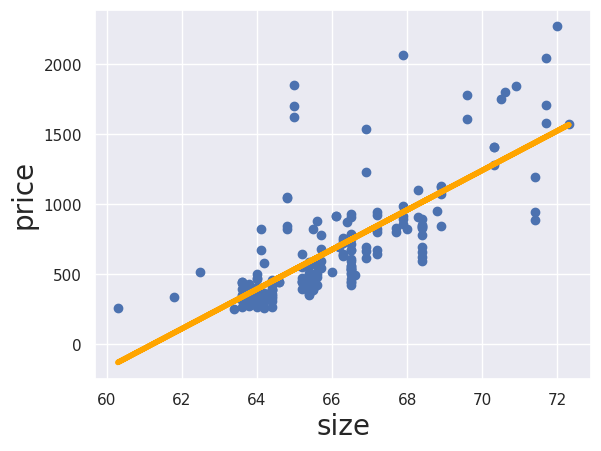

In [ ]:
# Plot the regression line on the scatter plot of price vs. motor size

plt.scatter(x,y)
# yhat = b0 + b1.x1
b0 = -8654.76
b1 = 141.39
yhat = b0 + b1*x
fig = plt.plot(x,yhat, lw=4, c='orange')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

By looking at the R-squared value, can you tell if the motor size is a poor/decent/excellent factor to explain price? How can you improve the explanatory power of the model?

By looking at the R-squared value, can you tell if the motor size is a decent factor to explain price. We can improve the R-squared value by including more variables that the price might depend on and perform multiple linear regression.

### 5.3 Now, use the function to obtain the output for multiple regression between price and three features, size, power and time.

In [ ]:
x = data_pp[['size', 'power', 'time100']]
y = data_pp['price']

output = model_regression(x,y)
output

{'coefficients': array([78.13646303,  0.58127138,  1.37820124]),
 'intercept': -5160.68510760626,
 'R2': 0.7527213769242372}

- Did the R2 value increase or decrease compared to the one obtained in simple regression? Why?
- Write down the linear regression model

- The R2 value did increase compared the one obtained in simple regression. This potentially suggests that the additional variables 'power' and 'time100' improve the explanatory power. In order to confirm this, we can either use adjusted R2 approach or use the F regression test.

- The regression model is: yhat = -5160.69 + 78.14 $\times$ size + 0.58 $\times$ power + 1.38 $\times$ time

### 5.4 Carry out an F regression test to determine which features are significant.

In [ ]:
from sklearn.feature_selection import f_regression

f_regression(x,y)

(array([276.42364586, 382.16340918, 180.20316324]),
 array([9.62743788e-40, 1.48343657e-48, 7.97868425e-30]))

In [ ]:
p_values = f_regression(x,y)[1]
p_values.round(3)

array([0., 0., 0.])

Based on these results, we can say that all three features, i.e. motor size, power and time100 are significant and do improve the explanatory power of the model.

## Question 2

Last week, we learnt that imputation of missing values can be done more meaningfully if there are correlations between variables and if we can take that into consideration. This question is aimed to further improve upon this idea by replacing the missing values using a linear regression model.

Use the 'coffee_grinder_imputation.xlsx' file. You will see that there is an extra variable called time75 (time taken by the grinder to grind 1 kg of coffee beans at 75% capacity). This column contains several missing values and you are asked to impute them.

Write a code that calculates the correlation between the input variables and find out which variable is most correlated with time75. Once this is done, write a linear regression code to connect these two and impute the missing values.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/CEIC6789_T2_2024/week3/coffee_grinder_imputation.xlsx'

raw_data = pd.read_excel(path)
raw_data.head()

,name,size,power,time100,time75,price
0,grinder1,64.1,1110,42,54.0,674.75
1,grinder2,64.1,1110,42,54.0,825.00
2,grinder3,65.5,1540,38,52.0,825.00
3,grinder4,66.2,1020,48,60.0,697.50
4,grinder5,66.4,1150,36,44.0,872.50


In [ ]:
inputs = raw_data.drop(['name', 'price'], axis=1)
inputs.head()

,size,power,time100,time75
0,64.1,1110,42,54.0
1,64.1,1110,42,54.0
2,65.5,1540,38,52.0
3,66.2,1020,48,60.0
4,66.4,1150,36,44.0


In [ ]:
inputs.corr()

,size,power,time100,time75
size,1.000000,0.640732,-0.642704,-0.676113
power,0.640732,1.000000,-0.801456,-0.764621
time100,-0.642704,-0.801456,1.000000,0.969947
time75,-0.676113,-0.764621,0.969947,1.000000


In [ ]:
inputs_no_mv = inputs.dropna(axis=0)
inputs_no_mv.describe()

,size,power,time100,time75
count,193.000000,193.000000,193.000000,193.000000
mean,65.941969,1043.212435,50.321244,61.378238
std,2.166735,395.890401,12.895429,13.694089
min,60.300000,480.000000,26.000000,32.000000
25%,64.200000,700.000000,38.000000,50.000000
50%,65.500000,950.000000,48.000000,60.000000
75%,66.600000,1160.000000,60.000000,68.000000
max,72.300000,2880.000000,98.000000,108.000000


In [ ]:
# Build linear regression model between time100 and time75 (time100 is most correlated with time75)

x = inputs_no_mv['time75']
y = inputs_no_mv['time100']

output = model_regression(x,y)
output

{'coefficients': array([0.91337854]),
 'intercept': -5.740322116436232,
 'R2': 0.9407977410336482}

In [ ]:
# Fill missing values in column 'time75' with the built regression model using column 'time100'
inputs['time75'] = inputs['time75'].fillna(-5.74 + 0.91*inputs['time100'])

In [ ]:
inputs.describe()

,size,power,time100
count,205.000000,205.000000,205.000000
mean,65.907805,1041.170732,50.439024
std,2.145204,395.441668,13.084283
min,60.300000,480.000000,26.000000
25%,64.100000,700.000000,38.000000
50%,65.500000,950.000000,48.000000
75%,66.900000,1160.000000,60.000000
max,72.300000,2880.000000,98.000000
